In [ ]:
!wget https://ih1.redbubble.net/image.831283086.1822/raf,360x360,075,t,fafafa:ca443f4786.u2.jpg

--2025-01-10 09:09:36--  https://ih1.redbubble.net/image.831283086.1822/raf,360x360,075,t,fafafa:ca443f4786.u2.jpg
Resolving ih1.redbubble.net (ih1.redbubble.net)... 104.18.43.189, 172.64.144.67, 2606:4700:4400::ac40:9043, ...
Connecting to ih1.redbubble.net (ih1.redbubble.net)|104.18.43.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘raf,360x360,075,t,fafafa:ca443f4786.u2.jpg’

raf,360x360,075,t,f     [ <=>                ]  14.20K  --.-KB/s    in 0s      

2025-01-10 09:09:37 (96.9 MB/s) - ‘raf,360x360,075,t,fafafa:ca443f4786.u2.jpg’ saved [14539]



In [ ]:
!wget https://i.pinimg.com/originals/67/0e/1f/670e1fc607d825c1a783f4308043be28.jpg

--2025-01-10 10:51:46--  https://i.pinimg.com/originals/67/0e/1f/670e1fc607d825c1a783f4308043be28.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.54.161.106, 23.55.235.186, 2600:1408:c400:27::17da:daba, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.54.161.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30667 (30K) [image/jpeg]
Saving to: ‘670e1fc607d825c1a783f4308043be28.jpg’

670e1fc607d825c1a78 100%[===================>]  29.95K  --.-KB/s    in 0s      

2025-01-10 10:51:46 (156 MB/s) - ‘670e1fc607d825c1a783f4308043be28.jpg’ saved [30667/30667]



In [ ]:
mv 670e1fc607d825c1a783f4308043be28.jpg alien.jpg

In [ ]:
mv "raf,360x360,075,t,fafafa:ca443f4786.u2.jpg" cat.jpg

In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
A = np.array(Image.open('alien.jpg'))
print(A.shape)
N = A.shape[0]*A.shape[1]
im = np.reshape(A, [N, 3])
print(im.shape)

(720, 720, 3)
(518400, 3)


In [ ]:
## Έστω Κ = 2 κέντρα
K = 2
## Αυτή η δομή θα κρατάει την "υπευθυνότητα" κάθε κέντρου για κάθε datum
Z = np.zeros([N, K])
for i in range(K):
  Z[i:N//K, ] = 1
  Z[N//K:, 1] = 1
print(Z)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
distances = np.zeros([N, K])
kentra = np.zeros([K, 3])
print(kentra.shape)

(2, 3)


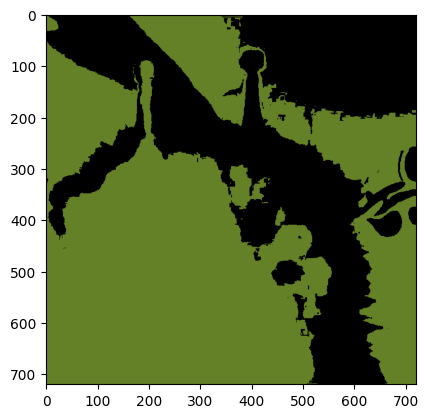

In [ ]:
for iter in range(10):
  # Υπολογισμός κέντρων
  for k in range(K):
    total_color = np.sum(np.outer(Z[:, k], np.ones([1,3])) * im, axis = 0)
    total_z = np.sum(Z[:, k])
    kentra[k:k+1, :] = total_color / total_z

  # Υπολογισμός υπευθυνότητας
  for k in range(K):
    distances[:, k] = np.sum((np.outer(kentra[k, :], np.ones([1,N])).T - im)**2, axis=1)

  tt = np.argmin(distances,axis=1)
  Z = np.eye(K)[tt]


for k in range(K):
  outim = np.zeros_like(im)
  outim[tt == k] = kentra[k:k+1, :]

out = np.reshape(outim, A.shape)
plt.imshow(out)